In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array

Using TensorFlow backend.


In [2]:
TRAIN_DIR = './dental_image/train/'

In [3]:
IM_WIDTH = 220
IM_HEIGHT = 220

In [4]:
datagen = ImageDataGenerator()

In [5]:
train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size = (IM_WIDTH, IM_HEIGHT),
    batch_size =30,
    class_mode = 'categorical',
    shuffle = 'True')

Found 150 images belonging to 3 classes.


In [6]:
train_generator.n

150

In [7]:
train_generator.batch_size

30

In [8]:
img, label = train_generator.next()

In [9]:
img.shape

(30, 220, 220, 3)

In [10]:
label_num = np.argmax(label,1)

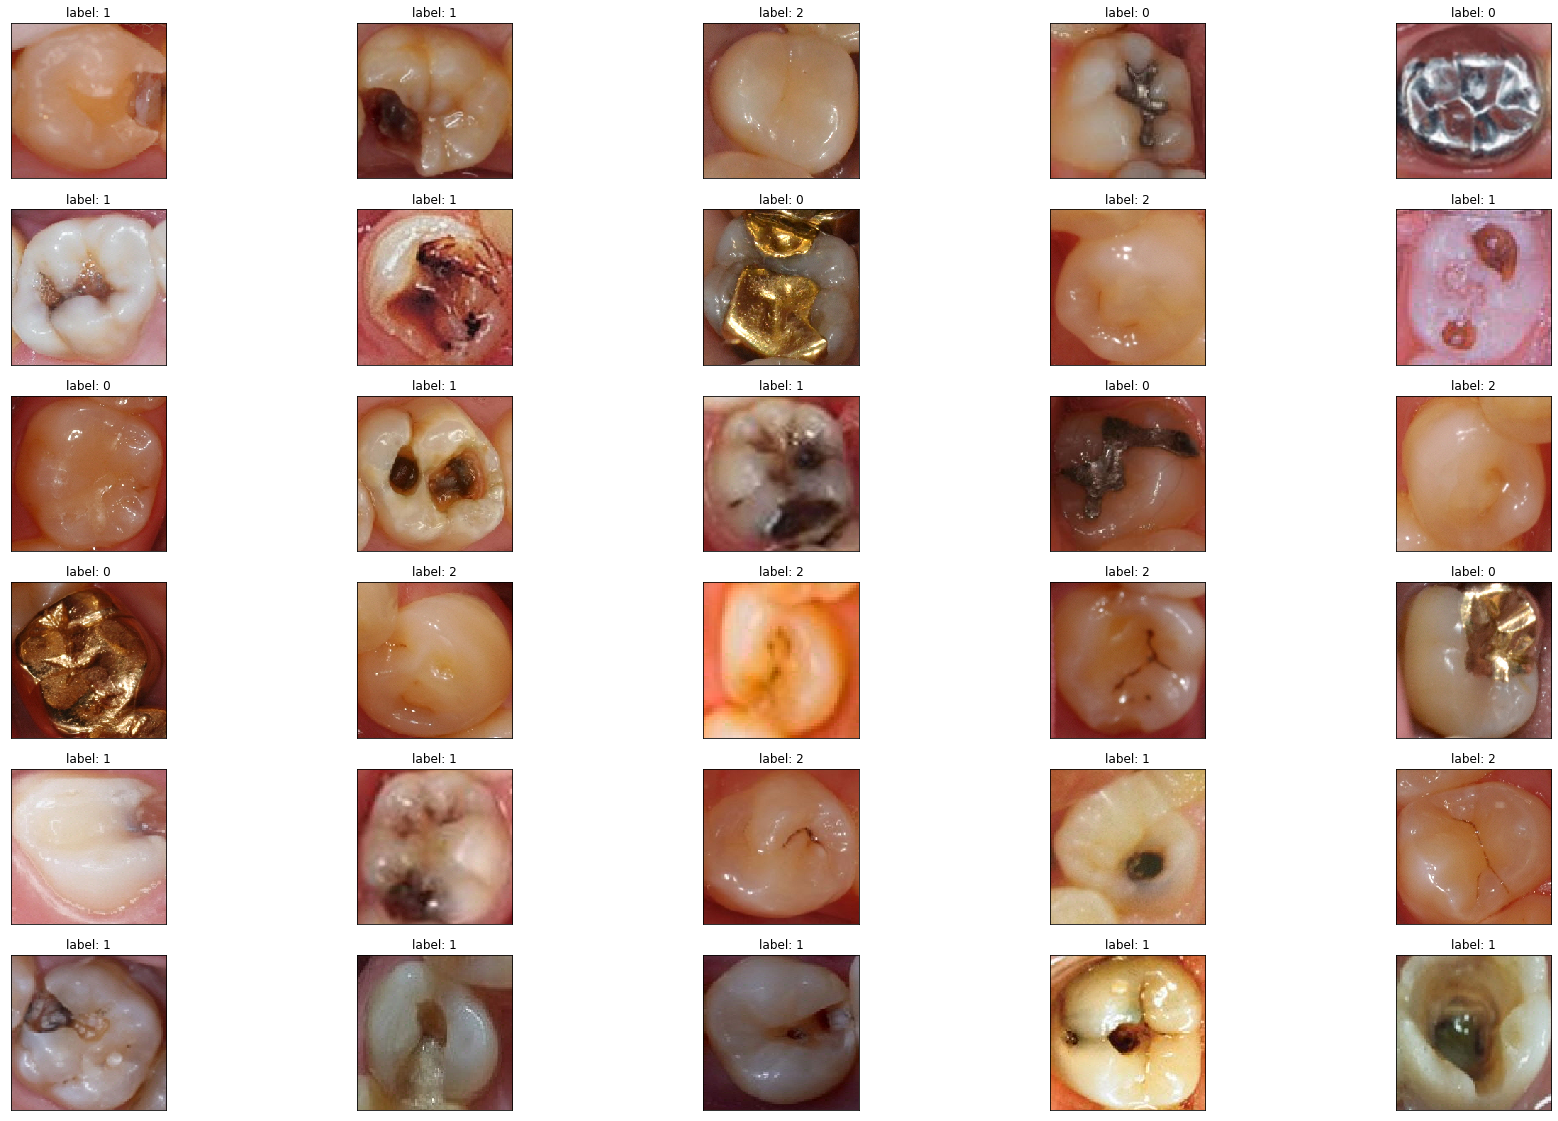

In [11]:
fig = plt.figure(figsize=(30,20))

for i in range(30):
    subplot = fig.add_subplot(6,5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('label: %d' %label_num[i])
    img[i] = img[i]/255.0
    subplot.imshow(img[i].reshape((IM_WIDTH,IM_HEIGHT,3)))
plt.show()

## 데이터 증강

In [12]:
datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

In [13]:
train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size = (IM_WIDTH, IM_HEIGHT),
    batch_size = 1,
    class_mode = 'categorical',
    shuffle = 'True')

Found 150 images belonging to 3 classes.


In [14]:
img, label = train_generator.next()
label_num = np.argmax(label,1)
img = img/255.0

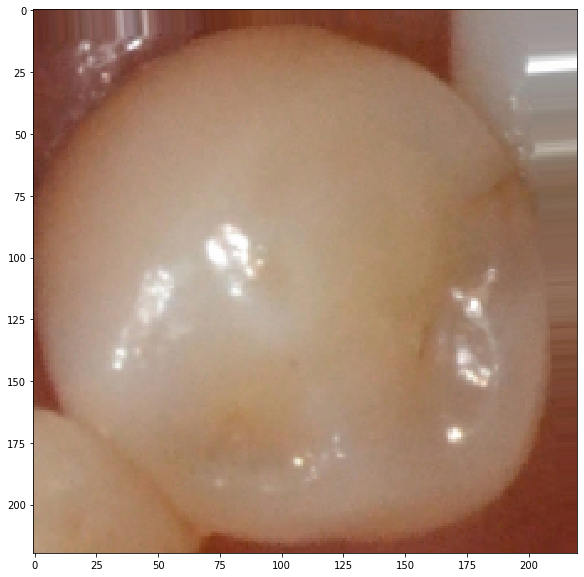

In [15]:
plt.figure(figsize=(20,10))
plt.imshow(img.reshape((IM_WIDTH,IM_HEIGHT,3)))
plt.show()

In [16]:
index=0
all_generate_img=[]
for generate_img in datagen.flow(img):
    all_generate_img.append(generate_img)
    index += 1
    if index >20:
        break

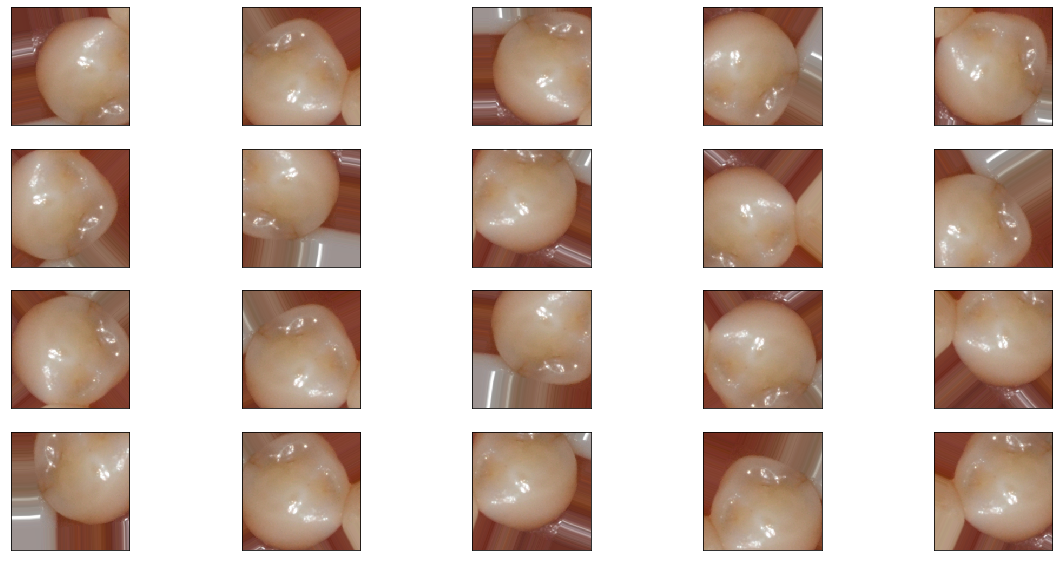

In [17]:
fig = plt.figure(figsize=(20,10))

for i in range(20):
    subplot = fig.add_subplot(4,5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(all_generate_img[i][0])
plt.show()

## CNN

In [45]:
TEST_DIR = './dental_image/test'

In [19]:
datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

In [20]:
train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size = (IM_WIDTH, IM_HEIGHT),
    batch_size = 50,
    class_mode = 'categorical',
    shuffle = 'True')

Found 150 images belonging to 3 classes.


In [47]:
test_datagen = ImageDataGenerator()

In [48]:
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size = (IM_WIDTH, IM_HEIGHT),
    batch_size = 60,
    class_mode = 'categorical',
    shuffle = 'False')

Found 60 images belonging to 3 classes.


In [23]:
img, label = train_generator.next()

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

In [25]:
model = Sequential()

In [30]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape = (220,220,3), activation='relu', padding='SAME'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=2, padding='SAME'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 220, 220, 32)      896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 774400)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               396493312 
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 1539      
Total params: 396,514,243
Trainable params: 396,514,243
Non-trainable params: 0
________________________________________

In [32]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

In [33]:
model.fit(train_generator, epochs=15)

Epoch 1/15
3/3 [==============================] - 51s 17s/step - loss: 36154.4654 - acc: 0.3400
Epoch 2/15
3/3 [==============================] - 27s 9s/step - loss: 28255.6170 - acc: 0.3000
Epoch 3/15
3/3 [==============================] - 22s 7s/step - loss: 4889.4510 - acc: 0.3333
Epoch 4/15
3/3 [==============================] - 22s 7s/step - loss: 482.2860 - acc: 0.3333
Epoch 5/15
3/3 [==============================] - 25s 8s/step - loss: 191.8461 - acc: 0.3733
Epoch 6/15
3/3 [==============================] - 20s 7s/step - loss: 52.9513 - acc: 0.4667
Epoch 7/15
3/3 [==============================] - 20s 7s/step - loss: 7.7122 - acc: 0.5533
Epoch 8/15
3/3 [==============================] - 20s 7s/step - loss: 1.6110 - acc: 0.7600
Epoch 9/15
3/3 [==============================] - 23s 8s/step - loss: 0.9667 - acc: 0.8200
Epoch 10/15
3/3 [==============================] - 21s 7s/step - loss: 0.5731 - acc: 0.8400
Epoch 11/15
3/3 [==============================] - 25s 8s/step - loss: 0

In [52]:
X_test, y_test = test_generator.next()

In [53]:
predict = model.predict(X_test)
predict01 = np.argmax(predict,1)
target = np.argmax(y_test, 1)
predict02 = (predict01 == target)
acc = np.sum(predict02)/len(predict02)
acc

0.4166666666666667

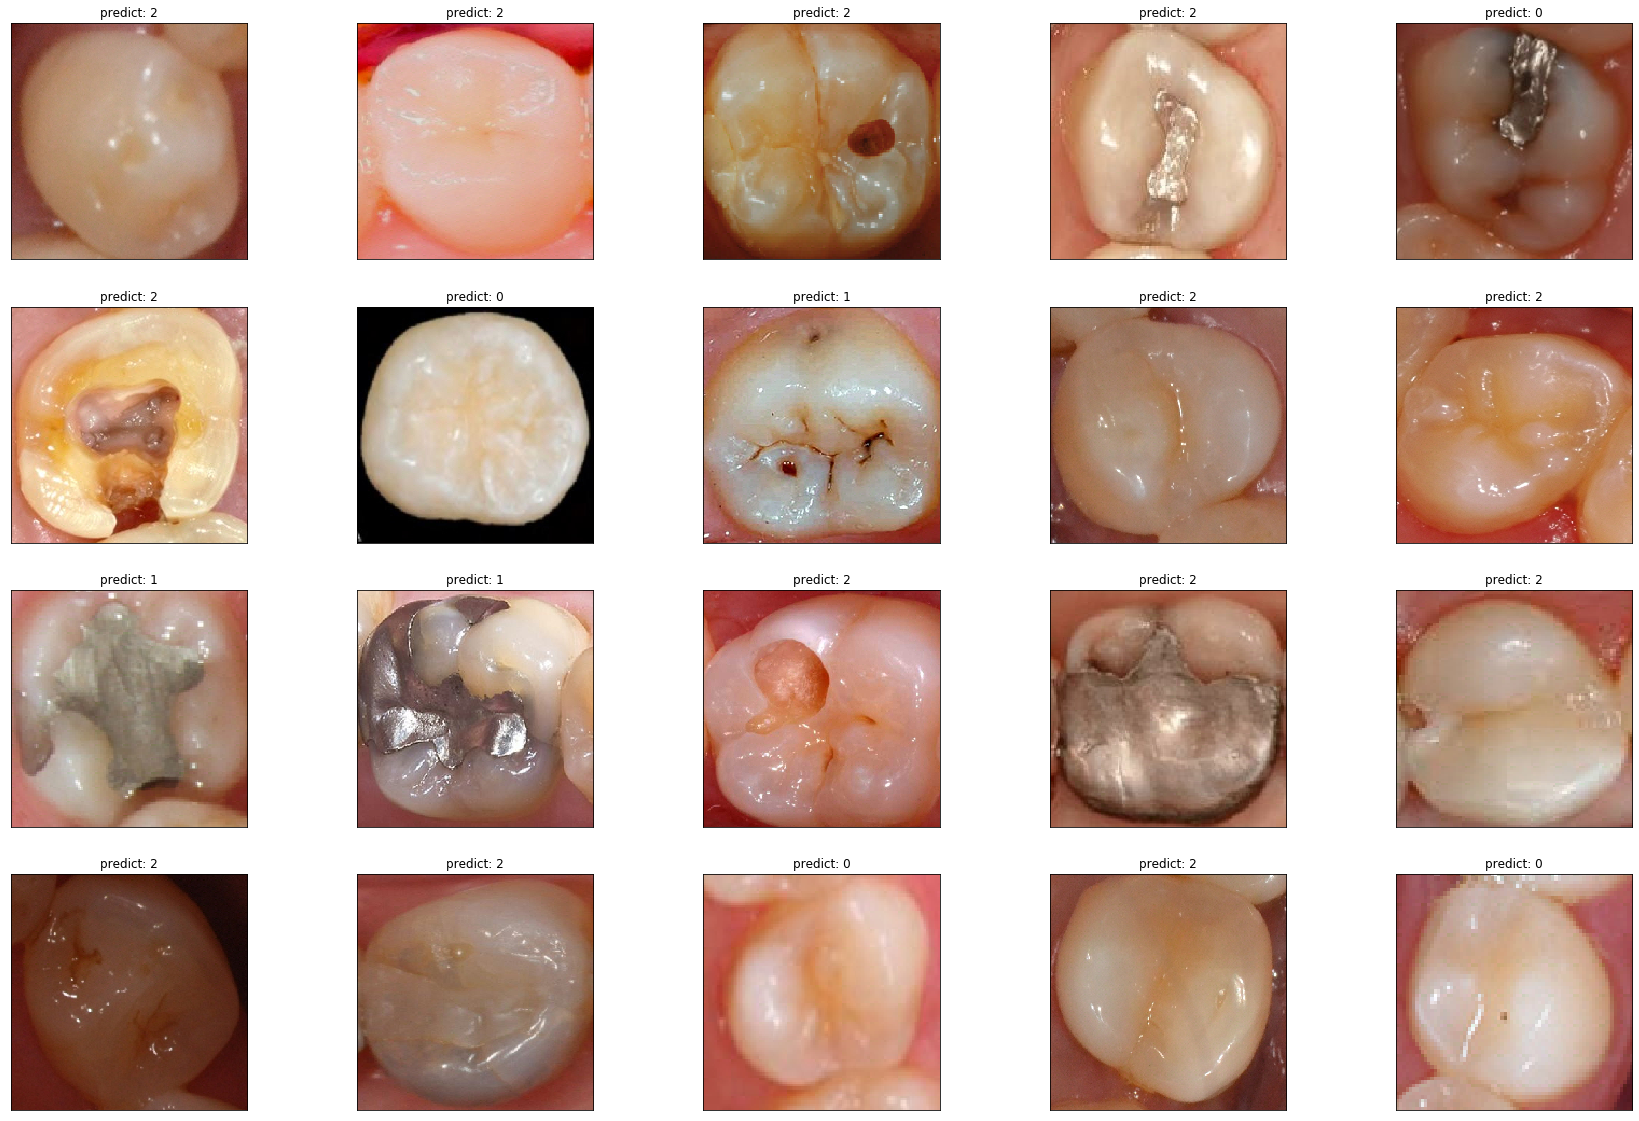

In [54]:
fig = plt.figure(figsize=(30,20))
for i in range(20):
    subplot = fig.add_subplot(4,5,i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('predict: %d' %predict01[i])
    X_test[i] = X_test[i]/255.0
    subplot.imshow(X_test[i].reshape((220,220,3)),
                  cmap=plt.cm.gray_r)
plt.show()